<a href="https://colab.research.google.com/github/DoItSon/playdata/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D/02_Pytorch_%EA%B8%B0%EC%B4%88_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- TPU는 아직까지 불안정하다.

# Pytorch
- 구글의 tensorflow와 유사한 딥러닝 라이브러리
- 페이스북 인공지능 연구팀에 의해 주로 개발 (개발자들 위한 다양한 프레임워크가 나온다.)
- torch
    - 텐서 변환 및 다양한 수학 함수와 클래스가 들어가 있다.
- torch.nn
    - 신경망을 구축하기위한 레이어(층), 활성화 함수, 손실함수 등이 들어있다.
- torch.utils.data
    - 미니배치 학습을 위한 데이터 셋을 구성하는 클래스들이 들어가 있다.
- torch.optim
    - optimizer 관련된 함수와 클래스가 있다.

In [ ]:
import torch
import numpy as np
# from torch import nn 으로 사용된다.
# 텐서플로우 keras가 좋지만 자유로운 인공지능 만들기에는 부족하다. (연구자들이 파이토치를 많이쓰기 때문에 최신모델 사용하기 좋다.)


# 텐서(Tensor)
- N-차원 배열
- 텐서는 다차원 배열이나 행렬과 매우 유사한 특수한 자료구조
- Pytorch 에서는 텐서를 딥러닝 모델의 입력과 출력으로 하여 학습을 진행

## 텐서 만들기

- tensor 함수
    - 입력받은 데이터를 텐서 객체로 반환

In [ ]:
data = [
    [1,2,3],
    [4,5,6]
]
x = torch.tensor(data)
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
type(x)

torch.Tensor

In [ ]:
x.dtype # 확인해야하는 일이 있다.

torch.int64

In [ ]:
arr = np.array(data)
torch.tensor(arr)

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

- Tensors 클래스
    - 입력받은 데이터를 텐서 객체로 반환
    - 다른점은 데이터 타입을 float32 로 변경해준다. (GPU에서 무조건 바꿔주어야 한다.)

In [ ]:
x = torch.Tensor(arr)
x

tensor([[1., 2., 3.],
        [4., 5., 6.]])

- 슬라이싱, 인덱싱, 마스킹 해보기!
- ones, zeros

In [ ]:
ones_tensor = torch.ones(2,3) # 1로 2행 3열이 채워진다.
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
zeros_tensor = torch.zeros(2,3)
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
x[:,2]

tensor([3., 6.])

In [ ]:
x[x>3] # 마스킹

tensor([4., 5., 6.])

In [ ]:
torch.cat([ones_tensor,zeros_tensor],dim = 1) # dim = axis 1과 같다.

tensor([[1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.]])

# 차원 변경
-  view 메소드
    - 원소의 순서대로 차원을 변경해서 반환

In [ ]:
x = torch.Tensor(arr)
x

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
x_view = x.view(3,2) # reshape과 비슷
x_view

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [ ]:
x_view[0,0] = 100 # 원본 데이터 유실과 상관없다.

In [ ]:
x # 메모리를 공유하기 때문에 원본 데이터가 유실될 수 있다.

tensor([[100.,   2.,   3.],
        [  4.,   5.,   6.]])

In [ ]:
x.reshape(3,2) # 복사본을 반환할지 원본을 반환할지에 대해 알 수 없다. 그래서 view를 쓴다.

tensor([[100.,   2.],
        [  3.,   4.],
        [  5.,   6.]])

- 복사하기

In [ ]:
x.clone()

tensor([[100.,   2.,   3.],
        [  4.,   5.,   6.]])

- transpose 메소드
    - 차원 맞바꾸기
    - 두개의 차원만 가능

In [ ]:
x

tensor([[100.,   2.,   3.],
        [  4.,   5.,   6.]])

In [ ]:
x.transpose(0,1) # 0번째와 1번째를 바꾸겠다는 의미

tensor([[100.,   4.],
        [  2.,   5.],
        [  3.,   6.]])

- permute 메소드
    - 여러개 차원 맞바꾸기

In [ ]:
arr = np.arange(1,25).reshape(2,3,4)
arr

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [ ]:
x = torch.Tensor(arr)
x

tensor([[[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]],

        [[13., 14., 15., 16.],
         [17., 18., 19., 20.],
         [21., 22., 23., 24.]]])

In [ ]:
x.permute(0,2,1)

tensor([[[ 1.,  5.,  9.],
         [ 2.,  6., 10.],
         [ 3.,  7., 11.],
         [ 4.,  8., 12.]],

        [[13., 17., 21.],
         [14., 18., 22.],
         [15., 19., 23.],
         [16., 20., 24.]]])

# 모델 학습에 사용할 CPU or GPU 장치 확인

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu" # True가 나오면 GPU가 존재한다는 의미
device

'cpu'

- 텐서를 gpu로 이동시키기

In [ ]:
x = x.to(device)
x

tensor([[[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]],

        [[13., 14., 15., 16.],
         [17., 18., 19., 20.],
         [21., 22., 23., 24.]]])

- 텐서가 위차한 장치 확인하기

In [ ]:
x.device

device(type='cpu')

In [ ]:
x = x.to("cpu")
x.device

device(type='cpu')

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
DATA_PATH = "/content/drive/MyDrive/data/"

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
df = pd.read_csv(f"{DATA_PATH}titanic.csv")
# 결측치 미리 채우기
df.age = df.age.fillna(df.age.median()) # age 중앙값
df.fare = df.fare.fillna(df.fare.median()) # fare 중앙값
df.cabin = df.cabin.fillna("UNK") # cabin 임의의 문자열로 채우기
df.embarked = df.embarked.fillna(df.embarked.mode()[0]) # embarked 최빈값
# 학습에 바로 사용가능한 특성
cols = ["pclass","age","sibsp","parch","fare"]
features = df[cols]
# 범주형 one-hot encoding
cols = ["gender","embarked"]
enc = OneHotEncoder()
tmp = pd.DataFrame(
    enc.fit_transform(df[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
features = pd.concat([features,tmp],axis=1) # 특성
target = df["survived"].to_numpy() # 정답값
# 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
SEED = 42
# 학습 검증 나누기
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(features, target, random_state=SEED)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((981, 10), (328, 10), (981,), (328,))

# Dataset 와 DataLoader
- torch.utils.data.Dataset
    - 학습데이터와 정답데이터를 인덱싱을 통해 반환하는 클래스
- torch.utils.data.DataLoader
    - Dataset의 데이터를 쉽게 접근할 수 있도록 iterable한 객체로 만들어준다.

In [ ]:
y_train.reshape(-1,1).shape # 파이토치는 최소 2차원이여한다. (텐서는 필요 X)

(981, 1)

In [ ]:
class TitanicDataset(torch.utils.data.Dataset):
    def __init__(self,x,y = None): # 정답데이터가 없을 때를 생각해 None값 넣음
        self.x = x
        self.y = y
        if self.y is not None:
            self.y = y.reshape(-1,1)
    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self,idx):
        item = {}
        item["x"] = torch.Tensor(self.x[idx])
        if self.y is not None:
            item["y"] = torch.Tensor(self.y[idx])
        
        return item
        # 여기까지 필수적으로 넣어주어야 한다. (Input Layer)

In [ ]:
train_dt = TitanicDataset(x_train,y_train)
train_dt

In [ ]:
train_dt[0]

{'x': tensor([0.5000, 0.3611, 0.1250, 0.0000, 0.0507, 1.0000, 0.0000, 0.0000, 0.0000,
         1.0000]), 'y': tensor([1.])}

In [ ]:
train_dl = torch.utils.data.DataLoader(train_dt,batch_size=2,shuffle=False)
train_dl # 예측할 때는 섞지 않고, 학습할 때는 섞기

In [ ]:
for i in train_dl:
    print(i)
    break

{'x': tensor([[0.5000, 0.3611, 0.1250, 0.0000, 0.0507, 1.0000, 0.0000, 0.0000, 0.0000,
         1.0000],
        [1.0000, 0.5365, 0.1250, 0.6667, 0.0915, 1.0000, 0.0000, 0.0000, 0.0000,
         1.0000]]), 'y': tensor([[1.],
        [0.]])}


In [ ]:
next(iter(train_dl)) # ["x"] # 잘 꺼내지는지 확인할 때 사용

{'x': tensor([[0.5000, 0.3611, 0.1250, 0.0000, 0.0507, 1.0000, 0.0000, 0.0000, 0.0000,
          1.0000],
         [1.0000, 0.5365, 0.1250, 0.6667, 0.0915, 1.0000, 0.0000, 0.0000, 0.0000,
          1.0000]]), 'y': tensor([[1.],
         [0.]])}

# 모델 계층(Layer) 정의해보기
- torch.nn.Linear
    - 가중치와 편향을 사용해서 입력에 대해 선형변환
    - in_features
        - 입력값의 개수
    - out_features
        - 출력값의 개수

In [ ]:
x_train.shape[1]

10

In [ ]:
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

input_layer = torch.nn.Linear(x_train.shape[1],1) # 다중 회귀
data = next(iter(train_dl))

hidden_layer = input_layer(data["x"]) # 학습데이터 x 넣기!
hidden_layer

tensor([[0.3096],
        [0.6673]], grad_fn=<AddmmBackward0>)

# 모델 만들기
- Pytorch에서 신경망 모델은 torch.nn.Module을 상속받아서 클래스를 생성해서 정의
- `__init__`메소드에서는 신경망의 계층들을 정의
- `forward` 메소드에서는 신경망에서 텐서를 어떻게 전달할지를 지정

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self,in_features):
        super().__init__()
        self.hidden_layer = torch.nn.Linear(in_features,1)
        # self.sig = torch.nn.Sigmoid()
        # 손실함수에서 시그모이드 함수를 통과시키는 기능이 있어서 따로 해줄 필요가 없다.
    def forward(self,x):
          x = self.hidden_layer(x)
          # x = self.sig(x)
          return x  # Hidden layer

In [ ]:
model = LogisticRegression(x_train.shape[1]) # SEED 고정을 안해서 값이 다르다.
model(data["x"])

tensor([[0.0070],
        [0.2196]], grad_fn=<AddmmBackward0>)

# 모델 학습

In [ ]:
batch_size = 32 # 미니 배치 사이즈

- 손실함수 객체 생성

In [ ]:
loss_fn = torch.nn.BCEWithLogitsLoss()
# 시그모이드 통과를 안시켜서 BCELoss 사용 X

- 모델 객체 생성

In [ ]:
model = LogisticRegression(x_train.shape[1]).to(device) # GPU로 이동!

- optimizer 객체 생성

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001) # lr = 0.001

- 학습데이터 객체 생성

In [ ]:
train_dt = TitanicDataset(x_train,y_train)
train_dl = torch.utils.data.DataLoader(train_dt,batch_size=batch_size,shuffle=True)

- 학습하기

In [ ]:
model.train() # 명시적으로 해주는 습관을 가지자!

epoch_loss = 0
for batch in train_dl:
    pred = model(batch["x"].to(device)) # GPU 안에 학습데이터를 모델에 넣는다.
    loss = loss_fn(pred,batch["y"].to(device)) # 정답값을 옮겨줘 손실값을 계산

    optimizer.zero_grad() # 경사를 0으로 초기화하고
    loss.backward() # 역전파 실행
    optimizer.step() # 업데이트 (다음 3가지는 세트!)

    epoch_loss += loss.item() # 값만 가져올 때 item

epoch_loss /= len(train_dl)
print(f"epoch loss: {epoch_loss}")
    # print(batch_loss) # 한번의 에폭 종료!

epoch loss: 0.7615217739535917


- 학습 loop 함수화

In [ ]:
def train_loop(train_dl,model,loss_fn,optimizer,device):
    model.train()

    epoch_loss = 0
    for batch in train_dl:
        pred = model(batch["x"].to(device))
        loss = loss_fn(pred,batch["y"].to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(train_dl)

    return epoch_loss

In [ ]:
train_loop(train_dl,model,loss_fn,optimizer,device) # 2번째 에폭

0.7423399283039954

- 검증셋에 대한 평가 loop 함수화

In [ ]:
@torch.no_grad() # with torch.no_grad():와 같다. 경사하강법에 따른 가중치를 계산하지 않겠다.(메모리도 많이 차지하고, 계산시간도 잡아먹기 때문에)
def test_loop(dataloader,model,loss_fn,device):
    epoch_loss = 0
    model.eval() # 랜덤적인 요소를 없애기 위해 eval을 선언 (layer들을 알아서 off 시키도록 하는 함수)
    # eval은 검증이나 테스트에서 선언하는 것! (학습에서는 사용하지 않는다.)
    for batch in dataloader:
        pred = model(batch["x"].to(device))
        loss = loss_fn(pred,batch["y"].to(device))

        epoch_loss += loss.item()

    epoch_loss /= len(dataloader)

    return epoch_loss

In [ ]:
valid_dt = TitanicDataset(x_valid,y_valid) # 학습데이터를 검증하기 위해서 만듦!
valid_dl = torch.utils.data.DataLoader(valid_dt,batch_size=batch_size,shuffle=False)

In [ ]:
test_loop(valid_dl,model,loss_fn,device)

0.7517904259941794

- 검증평가뿐만 아니라 테스트데이터에 대한 예측만 해야하는 상황이라면?

In [ ]:
@torch.no_grad() # with torch.no_grad():와 같다.
def test_loop(dataloader,model,loss_fn,device):
    epoch_loss = 0
    model.eval() # 랜덤적인 요소를 없애기 위해 eval을 선언

    pred_list = []
    sig = torch.nn.Sigmoid() # 0과 1사이의 확률로 변환
    
    for batch in dataloader:
        pred = model(batch["x"].to(device))

        if batch.get("y") is not None: # y값이 있을 경우에만 loss 계산
            loss = loss_fn(pred,batch["y"].to(device))
            epoch_loss += loss.item()

        pred = sig(pred) # 시그모이드 함수 통과 0 ~ 1 확률값으로 변경
        pred = pred.to("cpu").numpy() # cpu 이동 후 numpy 변환
        pred_list.append(pred)

    epoch_loss /= len(dataloader)

    pred = np.concatenate(pred_list) # auc도 볼 수 있다.

    return epoch_loss,pred

In [ ]:
x_test = x_valid.copy() # 테스트 데이터라고 가정하고 복사

In [ ]:
test_dt = TitanicDataset(x_test)
test_dl = torch.utils.data.DataLoader(test_dt,batch_size=batch_size,shuffle=False)

_,pred = test_loop(test_dl,model,loss_fn,device)
pred

array([[0.43548584],
       [0.50419056],
       [0.43547758],
       [0.46744052],
       [0.37289846],
       [0.26883337],
       [0.37289846],
       [0.35799813],
       [0.31267574],
       [0.36820227],
       [0.43127477],
       [0.43652943],
       [0.4395618 ],
       [0.3198314 ],
       [0.43592188],
       [0.35671872],
       [0.37021402],
       [0.4354708 ],
       [0.40801257],
       [0.44177526],
       [0.4711563 ],
       [0.4391496 ],
       [0.42718893],
       [0.42771393],
       [0.4407235 ],
       [0.45517012],
       [0.43339115],
       [0.43762025],
       [0.46477994],
       [0.32468432],
       [0.43568015],
       [0.36222067],
       [0.3728993 ],
       [0.4301358 ],
       [0.4976283 ],
       [0.4899348 ],
       [0.37889856],
       [0.3114683 ],
       [0.43548125],
       [0.32646543],
       [0.5025921 ],
       [0.33414972],
       [0.37290213],
       [0.4286808 ],
       [0.44236574],
       [0.46511748],
       [0.42158246],
       [0.369

# 10 에폭 학습하고 검증평가해보기

In [ ]:
epochs = 10
for epoch in range(epochs):
    print(f"{epoch+1} epoch 시작")
    train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
    valid_loss, pred = test_loop(valid_dl, model, loss_fn, device)
    print(train_loss,valid_loss) # 적절한 에폭 선택으로 오버피팅을 방지

1 epoch 시작
0.7284330033486889 0.7388763644478538
2 epoch 시작
0.7147180226541334 0.7264711911028082
3 epoch 시작
0.7007835603529408 0.7149528319185431
4 epoch 시작
0.6898600939781435 0.7038845907558094
5 epoch 시작
0.6781554568198419 0.6928930553522977
6 epoch 시작
0.6673279058548712 0.682576445015994
7 epoch 시작
0.6592964856855331 0.6726287711750377
8 epoch 시작
0.6484159096594779 0.6627776189283892
9 epoch 시작
0.6379899747910038 0.6531625660982999
10 epoch 시작
0.6300130005805723 0.6440484957261519


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid,pred)

0.7694036501724338

# 정리해보자

## dataset 정의

In [ ]:
class TitanicDataset(torch.utils.data.Dataset):
    def __init__(self,x,y = None): # 정답데이터가 없을 때를 생각해 None값 넣음
        self.x = x
        self.y = y
        if self.y is not None:
            self.y = y.reshape(-1,1)
    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self,idx): # 슬라이싱을 하기 위해 쓰임
        item = {}
        item["x"] = torch.Tensor(self.x[idx])
        if self.y is not None:
            item["y"] = torch.Tensor(self.y[idx])
        
        return item
        # 여기까지 필수적으로 넣어주어야 한다. (Input Layer)

## 모델 정의

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self,in_features):
        super().__init__()
        self.hidden_layer = torch.nn.Linear(in_features,1)
        # self.sig = torch.nn.Sigmoid()
        # 손실함수에서 시그모이드 함수를 통과시키는 기능이 있어서 따로 해줄 필요가 없다.
    def forward(self,x):
          x = self.hidden_layer(x)
          # x = self.sig(x)
          return x  # Hidden layer

## 학습하는 함수 정의

In [ ]:
def train_loop(train_dl,model,loss_fn,optimizer,device):
    model.train()

    epoch_loss = 0
    for batch in train_dl:
        pred = model(batch["x"].to(device))
        loss = loss_fn(pred,batch["y"].to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(train_dl)

    return epoch_loss

## 평가 or 예측하는 함수정의

In [ ]:
@torch.no_grad() # with torch.no_grad():와 같다.
def test_loop(dataloader,model,loss_fn,device):
    epoch_loss = 0
    model.eval() # 랜덤적인 요소를 없애기 위해 eval을 선언

    pred_list = []
    sig = torch.nn.Sigmoid()
    
    for batch in dataloader:
        pred = model(batch["x"].to(device))

        if batch.get("y") is not None: # y값이 있을 경우에만 loss 계산(검증평가를 할 경우만 계산하고 싶을 때)
            loss = loss_fn(pred,batch["y"].to(device))
            epoch_loss += loss.item()

        pred = sig(pred) # 시그모이드 함수 통과 0 ~ 1 확률값으로 변경
        pred = pred.to("cpu").numpy() # cpu 이동 후 numpy 변환
        pred_list.append(pred)

    epoch_loss /= len(dataloader)

    pred = np.concatenate(pred_list) # auc도 볼 수 있다.

    return epoch_loss,pred

## 학습에 필요한 손실과 최적화 등 하이퍼 파라미터 정의

In [ ]:
loss_fn = torch.nn.BCEWithLogitsLoss()
epoch = 1000
batch_size = 32 # 8 16 32 64 이렇게 넣어주는 것이 좋다.
num_features = x_train.shape[1]

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits = 5, shuffle = True, random_state = SEED)

In [ ]:
features.shape, target.shape

((1309, 10), (1309,))

In [ ]:
is_holdout = True # 홀드아웃 첫번째 홀드만하고 빠져나옴!(True, False 왔다갔다 쓰기) => 시간을 아끼기 위해 성능이 좋아질 때 5번 다돌림
for tri,vai in cv.split(features):
    # 학습 데이터
    x_train = features[tri]
    y_train = target[tri]

    # 검증 데이터
    x_valid = features[vai]
    y_valid = target[vai]

    model = LogisticRegression(num_features).to(device)
    optimizer = torch.optim.Adam(model.parameters())

    train_dt = TitanicDataset(x_train,y_train)
    valid_dt = TitanicDataset(x_valid,y_valid)

    train_dl = torch.utils.data.DataLoader(train_dt,batch_size=batch_size,shuffle=True)
    valid_dl = torch.utils.data.DataLoader(valid_dt,batch_size=batch_size,shuffle=False)
    
    train_loss_history = []
    valid_loss_history = []

    for e in range(epoch):
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
        valid_loss,pred = test_loop(valid_dl, model, loss_fn, device)

        train_loss_history.append(train_loss) # 그래프 그리기!
        valid_loss_history.append(valid_loss)

    if is_holdout:
        break

- 시각화 해보기

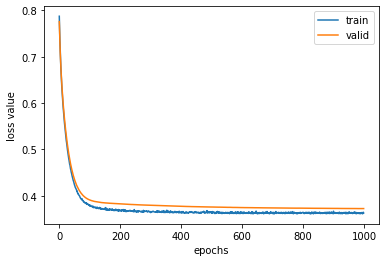

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

ax.plot(train_loss_history)
ax.plot(valid_loss_history)
ax.set_xlabel("epochs")
ax.set_ylabel("loss value")
ax.legend(["train","valid"])
plt.show()

- 검증셋 평가 및 검증셋에 대한 AUC 개선이 없을 경우 조기 종료 조건을 주고, 모델 가중치를 저장하기

In [ ]:
is_holdout = False # 홀드아웃 첫번째 홀드만하고 빠져나옴!(True, False 왔다갔다 쓰기) => 시간을 아끼기 위해 성능이 좋아질 때 5번 다돌림
for i,(tri,vai) in enumerate(cv.split(features)):
    # 학습 데이터
    x_train = features[tri]
    y_train = target[tri]

    # 검증 데이터
    x_valid = features[vai]
    y_valid = target[vai]

    model = LogisticRegression(num_features).to(device)
    optimizer = torch.optim.Adam(model.parameters())

    train_dt = TitanicDataset(x_train,y_train)
    valid_dt = TitanicDataset(x_valid,y_valid)

    train_dl = torch.utils.data.DataLoader(train_dt,batch_size=batch_size,shuffle=True)
    valid_dl = torch.utils.data.DataLoader(valid_dt,batch_size=batch_size,shuffle=False)

    best_score = 0
    patience = 0

    for e in range(epoch):
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
        valid_loss,pred = test_loop(valid_dl, model, loss_fn, device)

        score = roc_auc_score(y_valid,pred) # 현재 에폭에 검증셋에 대한 AUC
        patience =+ 1
        if best_score < score:
            patience = 0 # 최고점수 갱신 했으니 초기화
            best_score = score
            torch.save(model.state_dict(),f"model_{i}.pth") # 최고점수가 갱신되면 덮어씌운다.

        if patience == 5: # 5인 경우 멈춰라!
            break
    print(f"{i} 번째 폴드 AUC: {best_score}") # 폴드별 AUC 스코어라 점수가 다르다.

    if is_holdout:
        break # 저장해야 재현성이 보장된다. (파일을 제출)

0 번째 폴들 AUC: 0.8863344934969775
1 번째 폴들 AUC: 0.9104229417670683
2 번째 폴들 AUC: 0.8819743830053108
3 번째 폴들 AUC: 0.9090992647058824
4 번째 폴들 AUC: 0.8934974747474748


In [ ]:
x_test.shape # 정답이 없는 테스트 셋이라 가정

(328, 10)

- 저장된 모델 불러오고 추론하기

In [ ]:
test_dt = TitanicDataset(x_test)
test_dl = torch.utils.data.DataLoader(test_dt,batch_size=batch_size,shuffle = False)

In [ ]:
pred_list = []
for i in range(5):
    model = LogisticRegression(num_features).to(device)
    state_dict = torch.load(f"model_{i}.pth") # 가중치 로드됨!
    model.load_state_dict(state_dict)
    _,pred = test_loop(test_dl,model,loss_fn,device)
    pred_list.append(pred)
pred = np.mean(pred_list,axis=0) # 5개의 모델에 대한 산술평균 앙상블
pred # 제출!

array([[0.08533058],
       [0.22296019],
       [0.08528741],
       [0.12948053],
       [0.7708715 ],
       [0.74885046],
       [0.7708715 ],
       [0.83698016],
       [0.67536837],
       [0.10031857],
       [0.07626975],
       [0.08779814],
       [0.27049053],
       [0.9023609 ],
       [0.08763321],
       [0.84494674],
       [0.74032766],
       [0.08525212],
       [0.17055663],
       [0.10197818],
       [0.14411987],
       [0.09450355],
       [0.06706679],
       [0.06789369],
       [0.09888658],
       [0.5373607 ],
       [0.08066011],
       [0.0842128 ],
       [0.12657051],
       [0.716063  ],
       [0.0863491 ],
       [0.85189533],
       [0.7708821 ],
       [0.07638814],
       [0.23131159],
       [0.10780396],
       [0.8025549 ],
       [0.592561  ],
       [0.08530638],
       [0.79086775],
       [0.21318181],
       [0.792878  ],
       [0.77091837],
       [0.07151088],
       [0.30994862],
       [0.11402686],
       [0.05688124],
       [0.098